<a href="https://colab.research.google.com/github/turtle-jaewoo/Data_Analysis/blob/main/Ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chpater 3 넘파이 기본: 배열과 벡터 연산

- Numpy: Numerical Python의 준말로 산술 계산을 위한 필수 패키지
- 넘파이에서 제공하는 기능     
  -> 빠른 배열 계산과 유연한 브로드캐스팅 기능을 제공하는 효율적인 다차원 배열인 ndarray    
  -> 반복문을 작성할 필요 없이 전체 데이터 배열을 빠르게 계산하는 표준 수학 함수      
  -> 배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 적재된 파일을 다루는 도구      
  -> 선형 대수, 난수 생성기, 루리에 변환 기능     
  -> C, C++, 포트린으로 작성된 코드를 넘파이와 연결하는 C API
- 대부분의 데이터 분석 어플리케이션에서 중요하게 여겨지는 기능     
  -> 데이터 먼징, 정제, 부분집합, 필터링, 변형 그리고 다른 종류의 연산을 빠르게 수행하는 배열 기반 작업     
  -> 정렬, 유일 원소 찾기, 집합 연산과 같은 일반적인 배열 처리 알고리즘     
  -> 효과적인 기술 통계와 데이터의 수집, 요약      
  -> 다양한 종류의 데이터를 병합하고 엮기 위한 데이터 정렬과 데이터 간의 관계 조작      
  -> if-elif-else를 사용하는 반복문 대신 배열 표현식으로 조건부 로직 표현    
  -> 수집, 변형, 함수 적용 같은 그룹별 데이터 조작

In [1]:
# 파이썬 리스트와 넘파이 배열의 성능 비교
import numpy as np

my_arr = np.array(1000000)
my_list = list(range(1000000))

%timeit my_arr2 = my_arr*2
%timeit my_list2 = [x*2 for x in my_list]

1.92 µs ± 574 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
207 ms ± 59.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 3.1 다차원 배열 객체 ndarray

- 넘파이의 핵심 기능: ndarray라고 하는 N차원의 배열 객체
- 파이썬에서 사용할 수 있는 대규모 데이터셋을 담을 수 있는 빠르고 유연한 자료구조
- 배열을 사용하면 스칼라 원소 간의 연산에 사용하는 문법과 비슷한 방식을 사용해 전체 데이터 블럭에 수학적 연산 수행 가능

In [2]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [3]:
# data 값에 산술 연산을 수행
print(data*10)
print(data+data)

[[ 15.  -1.  30.]
 [  0. -30.  65.]]
[[ 3.  -0.2  6. ]
 [ 0.  -6.  13. ]]


- ndarray는 같은 종류의 데이터를 담을 수 있는 포괄적인 다차원 배열
- 모든 배열은 각 차원의 크기를 알려주는 shape 튜플과 배열에 저장된 자료형을 알려주는 dtype 객체를 가짐

In [4]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### 3.1.1 ndarray 생성

- 배열을 생성하는 가장 쉬운 방법은 array 함수를 사용하는 것
- 순차적인 객체를 받아서 넘겨받은 데이터가 들어있는 새로운 넘파이 배열을 생성

In [5]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [6]:
# 리스트 길이가 동일한 주엋ㅂ된 순차 데이터는 다차원 배열로 변환 가능
data2 = [[1,2,3,4], [5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

- data2는 리스트를 담고 있는 리스트이므로 넘파이 배열인 arr2는 해당 데이터로부터 형태를 추론해 2차원 형태로 출력
- ndim과 shape 속성을 검사해서 이를 확인 가능

In [7]:
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


- 명시적으로 지정하지 않는 한 numpy.array는 생성될 때 적절한 자료형을 추론

In [8]:
print(arr1.dtype)
print(arr2.dtype)

float64
int64


- np.array는 새로운 모양의 배열을 생성하는 여러 함수를 가지고 있음
- zeros나 ones는 0과 1로 이루어진 배열을 생성
- empty 함수는 초기화 되지 않은 배열을 생성

In [9]:
print(np.zeros(10))
print(np.zeros((3,6)))
print(np.empty((2,3,2)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[[6.7674601e-310 0.0000000e+000]
  [0.0000000e+000 0.0000000e+000]
  [0.0000000e+000 0.0000000e+000]]

 [[0.0000000e+000 0.0000000e+000]
  [0.0000000e+000 0.0000000e+000]
  [0.0000000e+000 0.0000000e+000]]]


- arange 파이썬의 range 함수의 배열 버전

In [10]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

- 다음 표는 표준 배열 생성 함수 목록     

|함수|설명|
|------|-------|
|array|데이터를 ndarray로 변환하여 dtype을 명시하지 않은 경우 자료형을 추론하여 저장|
|asarray|입력 데이터를 ndarray로 변환하지만 입력 데이터가 이미 ndarray일 경우 복사가 일어나지 않음|
|arange|내장 range 함수와 유사하지만 리스트 대신 ndarray를 반환|
|ones, ones_like|ones는 주어진 dtype과 모양을 가지는 배열을 생성하고 내용을 모두 1로 초기화, ones_like는 주어진 배열과 동일한 모양과 dtype을 갖는 배열을 생성해 내용을 모두 1로 초기화|
|zeros, zeros_like|ones, ones_like와 동일하지만 내용을 0으로 채움|
|empty, empty_like|메모리를 할당해 새로운 배열을 생성하지만 ones나 zeros처럼 값을 초기화 하진 않음|
|full, full_like|인수로 받은 dtype과 배열의 모양을 가지는 배열을 생성하고 인수로 받은 값으로 배열을 채움|
|eye, identity|N * N 크기의 단위 행렬을 생성|

### 3.1.2 ndarray의 자료형

- 자료형은 ndarray가 메모리에 있는 특정 데이터를 해석하는데 필요한 정보를 담고 있는 특수 개체

In [11]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


- 대부분의 경우 디스크에소 읽고 쓰기 편하도록 저수준의 표현에 직접적으로 맞춰져 있어서 C언어나 포틀린 같은 저수준 언어로 작성된 코드와 쉽게 연동 가능
- 넘파이가 지원하는 모든 자료형 목록    

|자료형|자료형 코드|설명|
|-----|-----|-----|
|int8, unit8|i1, u1|부호가 있는 8비트(1바이트) 정수형과 부호가 없는 8비트 정수형|
|int16, unit16|i2, u2|부호가 있는 16비트 정수형과 부호가 없는 16비트 정수형|
|int32, unit32|i4, u4|부호가 있는 32비트 정수형과 부호가 없는 32비트 정수형|
|int64, unit64|i8, u8|부호가 있는 64비트 정수형과 부호가 없는 64비트 정수형|
|float16|f2|반정밀도 부동소수점|
|float32|f4 or f|단정밀도 부동소수점, C언어의 float형과 호환|
|float64|f8 or d|배정밀도 부동 소수점, C언어의 double형과 Python의 float 객체와 호환|
|float128|f16 or g|확정정밀도 부동소수점|
|complex64, complex128, complex256|c8, c16, c32|각각 두 개의 32, 64, 128비트 부동 소수점을 가지는 복소수|
|bool|?|True와 False 값을 지정하는 불리언형|
|object|0|파이썬의 객체형|
|string_|S|고정 길이 아스키 문자열형(각 문자는 1바이트), 길이가 10인 문자열 dtype은 S10이 됨|
|unicode_|U|고정 길이 유니코드형(플랫폼별 문자열 바이트 수 상이), string_형과 같은 형식을 사용|

- ndarray의 astype 메서드를 사용해 배열의 dtype을 다른 형으로 명시적으로 뱐환 가능

In [12]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)

float_arr = arr.astype(np.float64)
print(float_arr)
print(float_arr.dtype)

int64
[1. 2. 3. 4. 5.]
float64


- 부동소수점 -> 정수형 변환 시 소수점 아래는 삭제

In [13]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
arr.astype(np.int32)

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]


array([ 3, -1, -2,  0, 12, 10], dtype=int32)

- 숫자 형식의 문자열을 담고있는 배열이 있다면 astype으로 숫자로 변환 가능

In [14]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

- 다른 배열의 dtype 속성을 사용하거나 축약 코드 사용 가능

In [15]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [16]:
zeros_unit32 = np.zeros(8, dtype='u4')
zeros_unit32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

### 3.1.3 넘파이 배열의 산술 연산

- 배열은 for문을 사용하지 않고 데이터를 일괄 처리할 수 있음.
- 이를 벡터화라고 부르며 크기가 동일한 배열간의 산술 연산은 배열의 각 원소 단위로 적용

In [17]:
import numpy as np
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print(arr*arr)
print(arr-arr)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


- 스칼라 인수가 포함된 산술 연산의 경우 배열 내의 모든 원소에 스칼라 인수가 적용됨

In [18]:
print(1/arr)
print(arr**2)

[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[ 1.  4.  9.]
 [16. 25. 36.]]


- 크기가 동일한 배열간의 비교 연산은 불리언 배열을 반환

- *크기가 다른 배열간의 연산은 브로드캐스팅(broadcasting)이라 불림

In [19]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr2)
arr2>arr

[[ 0.  4.  1.]
 [ 7.  2. 12.]]


array([[False,  True, False],
       [ True, False,  True]])

### 3.1.4 색인과 슬라이싱 기초

- 데이터의 부분집합이나 개별 원소를 선택하는 수 많은 방법이 존재
- 1차원 배열은 표면적으로 파이썬의 리스트와 유사하게 작동

In [20]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
# arr[5:8] = 12로 배열 슬라이스에 스칼라 값을 대입하여 12가 선택 영역 전체로 전파됨
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [21]:
arr_slice = arr[5:8]
print(arr_slice)

[12 12 12]


- arr_slice의 값을 변경하면 원래 배열인 arr의 값도 바뀜

In [22]:
arr_slice[1] = 12345
print(arr)

[    0     1     2     3     4    12 12345    12     8     9]


- 단순히 [:]로 슬라이스하면 배열의 모든 값에 할당됨

In [23]:
arr_slice[:] = 64
print(arr)

[ 0  1  2  3  4 64 64 64  8  9]


- 2차원 배열에서 각 색인에 해당하는 원소는 스칼라 값이 아닌 1차원 배열
- 따라서 개별 원소는 재귀적으로 접근 -> 매우 귀찮은 작업이므로 쉼표로 구분된 리스트를 넘김

In [24]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[2])
# 다음 두 표현은 동일
print(arr2d[0][2])
print(arr2d[0, 2])

[7 8 9]
3
3


- 다차원 배열에서 마지막 색인을 생략하면 반환되는 객체는 상위 차원의 데이터를 모두 포함한 한 차원 낮은 ndarray가 반환

In [25]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)
print('array of size 2*3: ')
arr3d[0]

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
array of size 2*3: 


array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
#arr3d[0]에는 스칼라 값과 배열 모두 할당 가능
old_values = arr3d[0].copy()
arr3d[0] = 42
print(arr3d)
arr3d[0] = old_values
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


- arr3d[1, 0]은 (1, 0)으로 색인되는 1차원 배열과 그 값을 반환

In [27]:
arr3d[1, 0]

array([7, 8, 9])

In [28]:
# 다음 표현은 두번에 걸쳐 인덱싱한 결과와 동일
x = arr3d[1]
print(x)
x[0]

[[ 7  8  9]
 [10 11 12]]


array([7, 8, 9])

#### 슬라이스로 선택하기

- 파이썬의 리스트 같은 1차원 객체처럼 ndarray도 익숙한 문법으로 슬라이싱 가능

In [29]:
print(arr)
print(arr[1:6])

[ 0  1  2  3  4 64 64 64  8  9]
[ 1  2  3  4 64]


- 2차원 배열의 슬라이싱 방식이 다름

In [30]:
print(arr2d)
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


- 첫 번째 축인 0번축을 기준으로 슬라이싱됨
- 슬라이스는 축을 따라 선택 영역 내의 원소를 선택
- arr2d[:2]는 시작부터 두 번째 행까지 선택
- 색인을 여러 개 넘겨서 다차원을 슬라이싱할 수 있음

In [31]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

- 해당 방식으로 항상 동일한 차원의 배열뷰를 얻을 수 있음
- 정수 색인과 슬라이스를 함께 사용하면 한 차원 낮은 슬라이스를 얻을 수 있음

In [32]:
lower_dim_slice = arr2d[1, :2]
print(lower_dim_slice)
lower_dim_slice.shape

[4 5]


(2,)

- 열만 사용하면 전체 축을 선택한다는 의미이기 때문에 원래 차원의 슬라이스를 얻음

In [33]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

- 슬라이싱 구문에 값을 대입하면 선택 영역 전체에 값이 할당됨

In [34]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 3.1.5 불리언 값으로 선택하기

- 다음과 같이 데이터를 가진 배열이 있고 이름이 중복된 배열이 있다고 가정

In [35]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[  4   7]
 [  0   2]
 [ -5   6]
 [  0   0]
 [  1   2]
 [-12  -4]
 [  3   4]]


- 각 이름은 data 배열의 각 행에 대응된다고 가정
- 전체 행에서 "Bob"과 동일한 이름을 선택하려면 산술 연산과 마찬가지로 배열에 대한 비교 연산도 벡터화됨
- names를 "Bob" 문자열과 비교하면 불리언 배열이 반환

In [36]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

- 불리언 배열은 배열의 색인으로 사용할 수 있음

In [37]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

- 불리언 배열은 반드시 색인하려는 축의 길이와 길이가 동일해야함
- 불리언 배열을 슬라이스나 정수를 선택하는데 짜 맞출 수 있음

In [38]:
# names == "Bob" 행에서 색인과 열을 함께 선택
data[names=="Bob", 1:]

array([[7],
       [0]])

In [39]:
data[names=="Bob", 1]

array([7, 0])

- "Bob"이 아닌 항목을 모두 선택하려면 != 연산자나 ~를 사용해서 조건부로 부인

In [40]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [41]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [42]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

- ~ 연산자는 변수가 참조하는 불리언 배열을 뒤집고 싶을 때 유용

In [43]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

- 세 가지 이름 중에서 두 가지의 이름을 선택하려면 &와 | 같은 논리 연산자를 사용해 여러개의 불리언 조건을 사용하면 됨

In [44]:
mask = (names == "Bob") | (names =="Will")
print(mask)
data[mask]

[ True False  True  True  True False False]


array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

- 불리언 색인을 이용하여 배열의 데이터를 선택하면 반환되는 배열의 내용이 바뀌지 않더라도 항상 데이터 복사가 발생함.
- 불리언 배열에 값을 대입하면 오른쪽에 있는 값을 불리언 배열의 값이 True인 위치로 대체하여 작동
- data에 저장된 모든 음수를 0으로 대입하려면 아래와 같이 수행

In [45]:
data[data<0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

- 1차원 불리언 배열을 사용해 전체 행이나 열의 값을 대입할 수 있음

In [46]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

### 3.1.6 팬시 색인

- 팬시 색인은 정수 배열을 사용한 색인을 설명하기 위해 넘파이에서 차용한 단어

In [47]:
# 8*4 크기의 배열

arr = np.zeros((8, 4))

for i in range(8):
  arr[i] = i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

- 특정 순서로 행의 하위 집합을 선택하고 싶다면 원하는 순서가 명시된 정수가 담긴 ndarray나 리스트를 넘기면 됨

In [48]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

- 색인으로 음수를 선택하면 끝에서부터 행을 선택함

In [49]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

- 다차원 색인 배열을 넘기면 각 색인 튜플에 대응하는 1차원 배열이 선택됨.

In [50]:
arr = np.arange(32).reshape((8, 4))
print(arr)
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([ 4, 23, 29, 10])

- 결과를 보면 (1, 0), (5, 3), (7, 1), (2, 2)에 대응하는 원소가 선택됨.
- 배열이 몇차원이든 팬시 색인의 결과는 1차원

- 행렬의 행과 열에 대응하는 사각형 모양의 값을 선택

In [51]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

- 팬시 색인은 슬라이싱과 달리 선택된 데이터를 새로운 배열로 복사
- 팬시 색인으로 값을 대입하면 색인된 값이 변경

In [52]:
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]])
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

[ 4 23 29 10]


array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

### 3.1.7 배열 전치와 축 바꾸기

- 배열 전치는 데이터를 복사하지 않고 데이터의 모양이 바뀐 뷰를 반환하는 기능
- ndarray는 transpose 메서드와 T라는 이름의 특수한 속성을 가짐.

In [53]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print(arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


- 행렬을 계산할 때 주로 사용하는 행렬의 내적은 numpy.dot를 사용

In [54]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
print(arr)
np.dot(arr.T, arr)

[[ 0  1  0]
 [ 1  2 -2]
 [ 6  3  2]
 [-1  0 -1]
 [ 1  0  1]]


array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

- @ 연산자: 행렬의 곱을 수행하는 또 다른 방법

In [55]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

- .T 속성을 아용하는 간단한 전치는 축을 뒤바꾸는 특별한 경우.
- ndarray애는 swapaxes라는 메서드를 통해 두 개의 축 번호를 받아 배열을 뒤바꿈

In [56]:
print(arr)
arr.swapaxes(0, 1)

[[ 0  1  0]
 [ 1  2 -2]
 [ 6  3  2]
 [-1  0 -1]
 [ 1  0  1]]


array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

## 3.2 난수 생성

- numpy.random 모듈은 파이썬 내장 random 모듈을 보강해 다양한 종류의 확률분포로부터 효과적으로 표본값을 생성하는데 주로 사용

In [57]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[ 0.06304518,  0.44398581,  0.06178863, -0.9244248 ],
       [-0.33658593, -0.43225603, -2.1577139 , -0.78155159],
       [ 0.36262611, -0.17186834,  1.32096674, -0.04370693],
       [ 1.75208859, -0.05146803, -1.11905318,  0.01650748]])

- 파이썬 내장 random 모듈은 한 번에 하나의 값만 생성

In [58]:
# 파이썬 내장 random 모듈과 numpy.random의 성능 비교

from random import normalvariate

N = 1000000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

889 ms ± 314 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
29.2 ms ± 840 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


- 해당 난수는 엄밀히 말하면 유사 난수라고 부름 -> 난수 생성기의 시드값에 따라 정해진 난수를 알고리즘으로 생성하기 때문
- numpy.random.standard_normal 같은 함수는 numpy.random 모듈의 기본 난수 생성기를 사용하지만 사용할 생성기를 명시적으로 설정 가능

In [59]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))

- seed 인수는 난수 생성기의 초기 상태를 결정하며 rng 객체가 데이터를 생성할 때마다 상태가 변경
- 생성기 객체인 rng는 numpy.random 모듈을 사용할 수 있는 다른 코드와도 분리 되어 있음

In [60]:
type(rng)

numpy.random._generator.Generator

- rng 같은 난수 생성기 객체에 사용할 수 있는 일부 메서드를 요약한 표

|메서드|설명|
|-----|-----|
|permutation|주어진 크기의 임의 순열을 반환하거나 주어진 리스트 순서를 뒤섞음|
|shuffle|리스트 배열의 순서를 뒤섞음|
|integers|주어진 상하한값 내에서 임의의 정숫값 몇 개를 뽑음|
|standard_normal|평균 0, 표준편차 1의 정규분포에서 표본을 추춘|
|binomial|이항분포에서 표본을 추출|
|normal|정규분포(가우시안)에서 표본을 추출|
|beta|베타 분포에서 표본을 추출|
|chisquare|카이제곱 분포에서 표본을 추출|
|gamma|감마 분포에서 표본을 추출|
|uniform|균등(0, 1) 분포에서 표본을 추출|

## 3.3 유니버설 함수: 배열의 각 원소를 빠르게 처리하는 함수

- ufunc라고도 부름
- ndarray 안의 데이터 원소별로 연산을 수행하는 함수
- 유니버설 함수는 하나 이상의 스칼라 값을 받아 하나 이상의 스칼라 결과괎을 반환하는 간단한 함수를 빠르게 수행하는 벡터화된 래퍼 함수
- 많은 ufunc는 numpy.sqrt나 numpy.exp 같은 간단한 변형을 전체 원소에 적용할 수 있음.

In [61]:
arr = np.arange(10)
print(arr)
print(np.sqrt(arr))
print(np.exp(arr))

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


- 위 함수들은 단항 유니버설 함수
- numpy.add나 numpy.maximum처럼 두 개의 매개변수를 취해서 단일 배열을 반환하는 함수 ->  이항 유니버설 함수

In [62]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)

print(x)
print(y)
#np.maximum은 x와 y의 원소별로 가장 큰 값을 계산
np.maximum(x, y)

[-1.3677927   0.6488928   0.36105811 -1.95286306  2.34740965  0.96849691
 -0.75938718  0.90219827]
[-0.46695317 -0.06068952  0.78884434 -1.25666813  0.57585751  1.39897899
  1.32229806 -0.29969852]


array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

- numpy.modf: 파이썬 내장 함수인 math.modf의 벡터화 버전, 여러 개의 배열을 반환하는 유니버설 함수

In [63]:
arr = rng.standard_normal(7) * 5
print(arr)
remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

[ 4.51459671 -8.10791367 -0.7909463   2.24741966 -6.71800536 -0.40843795
  8.62369966]
[ 0.51459671 -0.10791367 -0.7909463   0.24741966 -0.71800536 -0.40843795
  0.62369966]
[ 4. -8. -0.  2. -6. -0.  8.]


- 유니버설 함수는 선택적으로 out 인수를 사용해 계산 결과를 새로운 배열로 만들지 않고 기존 배열에 할당할 수도 있음

In [64]:
out = np.zeros_like(arr)
print(np.add(arr, 1))
print(np.add(arr, 1, out=out))
print(out)

[ 5.51459671 -7.10791367  0.2090537   3.24741966 -5.71800536  0.59156205
  9.62369966]
[ 5.51459671 -7.10791367  0.2090537   3.24741966 -5.71800536  0.59156205
  9.62369966]
[ 5.51459671 -7.10791367  0.2090537   3.24741966 -5.71800536  0.59156205
  9.62369966]


- 단항 유니버설 함수 표

|함수|설명|
|----|----|
|abs, fabs|각 원소의 절댓값, 복소수가 아닌 경우 빠른 연산을 위해 fabs를 사용|
|sqrt|각 원소의 제곱근을 계산|
|square|각 원소의 제곱을 계산|
|exp|각 원소의 지수 ex를 계산|
|log, log10, log2, log1p|각각 자연로그, 로그 10, 로그 2, 로그(1+x)|
|sign|각 원소의 부호를 계산(양수: 1, 0: 0, 음수: -1)|
|ceil|각 원소의 소수부를 올림. 각 원소의 값보다 같거나 큰 정수 중 가장 작은 정수를 반환|
|floor|각 원소의 소수부를 내림. 각 원소의 값보다 작거나 같은 정수 중 가장 작은 수를 반환|
|rint|각 원소의 소수부를 반올림. dtype은 유지|
|modf|각 원소의 몫과 나머지를 각각의 배열로 반환|
|isnan|각 원소가 숫자가 아닌지를 나타내는 불리언 배열을 반환|
|isfinite, isinf|각 배열의 각 원소가 유한한지 무한한지 나타내는 불리언 배열을 반환|
|cos, cosh, sin, sinh, tan, tanh|일반 삼각함수와 쌍곡선 삼각함수|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh|역삼각함수|
|logical_not|각 원소의 논리 부정 값을 계산. ~arr와 동일|

- 이항 유니버설 함수 표

|함수|설명|
|----|----|
|add|두 배열에서 같은 위치의 원소끼리 더함|
|subtract|첫 번째 배열의 원소에서 두 번쨰 배열의 원소를 뺌|
|multiply|배열의 원소끼리 곱함|
|divide, floor_divide|첫 번째 배열의 원소를 두 번째 배열의 원소로 나눔. floor_divide는 몫만 취함|
|power|첫 번째 배열의 원소를 두 번째 배열의 원소만큼 제곱|
|maximum, fmax|각 배열의 두 원소 중 큰 값을 선택. fmax는 NAN을 무시|
|minimum, fmin|각 배열의 두 원소 중 작은 값을 선택, fmin는 NAN을 무시|
|mod|첫 번째 배열의 원소를 두 번째 배열의 원소로 나눈 나머지 값을 구함|
|copysign|첫 번째 배열의 원소의 기호를 두 번째 배열의 원소의 기호로 교체|
|greater, greater_equal, less, less_equal, equal, not_equal|각 두 원소 간의 >, >=, <, <=, ==, != 비교 연산 결과를 불리언 배열로 반환|
|logical_and|각 두 원소 간의 AND 논리 연산 결과를 반환|
|logical_or|각 두 원소 간의 OR 논리 연산 결과를 반환|
|logical_xor|각 두 원소 간의 XOR 논리 연산 결과를 반환|

## 3.4 배열을 이용한 배열 기반 프로그래밍

- 넘파이 배열을 사용하면 반복문을 작성하지 않고 간결한 배열 연산을 통해 많은 종류의 데이터 처리 작업을 할 수 있음
- 벡터화: 배열 연산을 사용해서 반복문을 명시적으로 제거하는 기법
- Ex) 값이 놓여져있는 그리드에서 sqrt(x^2 + y^2)를 계산.</br>
numpy.meshgrid 함수는 두 개의 1차원 배열을 받아 모든 (x, y) 짝을 만들 수 있는 2차원 배열 두 개를 반환

In [65]:
points = np.arange(-5, 5, 0.01)   #-5부터 4.99까지 0.01씩 증가하는 값의 배열

xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

- 그리드상의 두 점을 가지고 간단하게 계산 가능

In [66]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

- matplotlib을 이용한 2차원 배열의 시각화

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

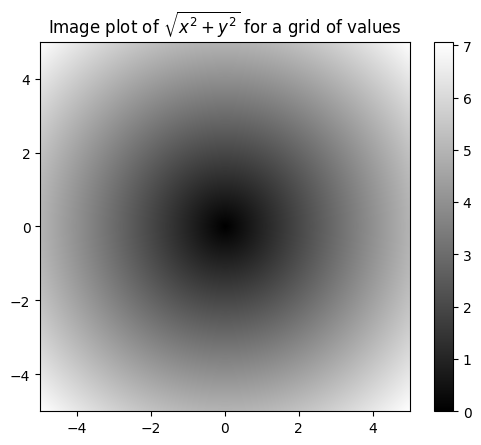

In [67]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

- IPython에서 작업하는 경우
```
plt.close("all")
```
을 실행해 열려있는 모든 플롯창을 닫을 수 있음.

#### 3.4.1 배열 연산으로 조건부 표현하기

- numpy.where 함수는 x if 조건 else y 같은 삼항식의 벡터화 버전

In [68]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

- cond의 값이 True일 경우 xarr의 값을 취하고 yarr의 값을 취하고 싶다면 리스트 표 기법을 이용

In [69]:
result = [(x if c else y)
            for x, y, c in zip(xarr, yarr, cond)]

result

[1.1, 2.2, 1.3, 1.4, 2.5]

- 해당 방식은 2가지의 문제점을 가지고 있음</br>
1. 순수 파이썬으로 수행되기 때문에 큰 배열을 빠르게 처리할 수 없음
2. 다차원 배열에서 사용할 수 없음
- np.where을 사용해서 간결하게 작성 가능

In [70]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

- np.where의 두 번째와 세 번째 인수는 배열이 아니어도 상관 X
- 둘 중 하나 or 둘 다 스칼라 값이어도 작동함
- 데이터 분석에는 다른 배열에 기반한 새로운 배열을 생성하기 위해 일반적으로 where을 사용

In [71]:
arr = rng.standard_normal((4, 4))
print(arr)
print(arr>0)
np.where(arr>0, 2, -2)

[[ 2.61815943  0.77736134  0.8286332  -0.95898831]
 [-1.20938829 -1.41229201  0.54154683  0.7519394 ]
 [-0.65876032 -1.22867499  0.25755777  0.31290292]
 [-0.13081169  1.26998312 -0.09296246 -0.06615089]]
[[ True  True  True False]
 [False False  True  True]
 [False False  True  True]
 [False  True False False]]


array([[ 2,  2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2]])

- numpy.where을 사용할 때 스칼라 값과 배열을 조합할 수 있음.

In [72]:
np.where(arr>0, 2, arr)   # 양수인 경우에만 값을 2로 변경

array([[ 2.        ,  2.        ,  2.        , -0.95898831],
       [-1.20938829, -1.41229201,  2.        ,  2.        ],
       [-0.65876032, -1.22867499,  2.        ,  2.        ],
       [-0.13081169,  2.        , -0.09296246, -0.06615089]])

### 3.4.2 수학 메서드와 통계 메서드

- 배열 전체 혹은 배열의 한 축에 속하는 자료에서 통계를 계산하는 수학 함수는 배열 클래스의 메서드로 사용할 수 있음
- 전체의 합이나 평균, 표준편차는 넘파이의 최상위 함수를 이용하거나 배열의 인스턴스 메서드를 사용해 계산
- numpy.sum 같은 넘파이 함수를 사용할 때는 첫 번째 인수로 계산하려는 배열을 넘겨주어야함.

In [73]:
# 임의의 정규분포 데이터를 생성하고 집계

arr = rng.standard_normal((5,4))
print(arr)
print(arr.mean())
print(np.mean(arr))
print(arr.sum())

[[-1.10821447  0.13595685  1.34707776  0.06114402]
 [ 0.0709146   0.43365454  0.27748366  0.53025239]
 [ 0.53672097  0.61835001 -0.79501746  0.30003095]
 [-1.60270159  0.26679883 -1.26162378 -0.07127081]
 [ 0.47404973 -0.41485376  0.0977165  -1.64041784]]
-0.08719744457434529
-0.08719744457434529
-1.743948891486906


- mean이나 sum 같은 함수는 선택적으로 axis 인수를 받아 해당 axis에 대한 통계를 계산하고 한 차수 낮은 배열을 반환

In [74]:
print(arr.mean(axis=1))    # 모든 열의 평균을 구해라
print(arr.sum(axis=0))     # 행의 합을 구해라

[ 0.10899104  0.3280763   0.16502112 -0.66719934 -0.37087634]
[-1.62923076  1.03990647 -0.33436331 -0.82026129]


- cumsum과 cumprod 메서드는 중간 계산 값을 담고있는 배열을 반환

In [75]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

- 다차원 배열에서 cumsum 같은 누적 함수는 크기가 동일한 배열을 반환
- 축을 지정해 부분적으로 계산을 하면 낮은 차수의 슬라이스를 반환

In [76]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr)
print(arr.cumsum(axis=0))   # 행의 누적합
print(arr.cumsum(axis=1))   # 열의 누적합

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]]


- 기본 배열 통계 메서드 표

|메서드|설명|
|----|----|
|sum|배열 전체 혹은 특정 축에 대한 모든 원소의 합을 계산, 크기가 0인 배열의 sum 결과는 0|
|mean|산술 평균을 구함. 크기가 0인 배열의 mean 결과는 NaN|
|std, var|각각 표준편차와 분산을 구함. 선택적으로 자유도를 줄 수 있으며 분모의 기본값은 n|
|min, max|최솟값과 최댓값|
|argmin, argmax|최소 원소의 색인값과 최대 원소의 색인값|
|cumsum|0부터 시작하는 각 원소의 누적합|
|sumprod|1부터 시작하는 각 원소의 누적 곱|

### 3.4.3 불리언 배열을 위한 메서드

- 이전 메서드의 불리언 값은 1(True), 또는 0(False)로 강제됨
- 불리언 배열에서 sum 메서드를 실행하면 True 원소의 개수가 반환

In [77]:
arr = rng.standard_normal(100)
print((arr>0).sum()) # 양수인 값의 개수
print((arr<=0).sum()) # 0 이하인 값의 개수

48
52


- (arr>0).sum() 구문에서 사용된 괄호는 arr > 0의 임시 결과를 sum() 호출 할 수 있도록 하는데 필요
- any, all 메서드는 불리언 배열에서 특히 유용
- any: 하나 이상의 True 값이 있는지 검사
- all: 모든 원소가 True인지 검사

In [78]:
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


### 3.4.4 정렬

- 파이썬의 내장 리스트 자료형처럼 넘파이 배열 또한 sort 메서드를 사용해 정렬 가능

In [79]:
arr = rng.standard_normal(6)

print(arr)

[ 0.07726066 -0.68391322 -0.72083767  1.12062282 -0.05481416 -0.08241372]


In [81]:
arr.sort()
arr

array([-0.72083767, -0.68391322, -0.08241372, -0.05481416,  0.07726066,
        1.12062282])

- 다차원 배열을 정렬할 때는 sort 메서드애 넘긴 축의 값에 따라 1차원 부분을 정렬

In [82]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.9359865 ,  1.23853712,  1.27279553],
       [ 0.40589222, -0.05032522,  0.28931754],
       [ 0.17930568,  1.39748056,  0.29204679],
       [ 0.63840567, -0.02788771,  1.37105185],
       [-2.05280763,  0.38050908,  0.75539067]])

- arr.sort(axis=0): 각 열의 값을 정렬
- arr.sort(axis=1): 각 행의 값을 정렬

In [83]:
arr.sort(axis=0)
print(arr)
arr.sort(axis=1)
print(arr)

[[-2.05280763 -0.05032522  0.28931754]
 [ 0.17930568 -0.02788771  0.29204679]
 [ 0.40589222  0.38050908  0.75539067]
 [ 0.63840567  1.23853712  1.27279553]
 [ 0.9359865   1.39748056  1.37105185]]
[[-2.05280763 -0.05032522  0.28931754]
 [-0.02788771  0.17930568  0.29204679]
 [ 0.38050908  0.40589222  0.75539067]
 [ 0.63840567  1.23853712  1.27279553]
 [ 0.9359865   1.37105185  1.39748056]]


- numpy.sort 메서드는 배열을 직접 변경하지않고 정렬된 결과를 가지고 있는 복사본을 반환

In [84]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

### 3.4.5 집합 관련 함수

- 넘파이는 1차원 ndarray를 위한 몇가지 기본적인 집합 연산을 제공
- 가장 자주 사용하는 함수: numpy.unique(배열 내에 중복된 원소를 제공하고 남은 원소를 정렬된 형태로 반환)

In [85]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [87]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [88]:
# numpy.unique를 파이썬으로 구현
sorted(set(names))

['Bob', 'Joe', 'Will']

- 대부분의 경우 넘파이 버전이 빠름
- numpy.in1d: 인수로 받은 배열의 원소가 기존 배열에 포함되는지 검사한 후 불리언 배열로 반환

In [89]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

- 넘파이에서 제공하는 집합 함수

|메서드|설명|
|----|----|
|unique(x)|배열 x에서 중복된 원소를 제거한 뒤 정렬해 반환|
|intersec1d(x, y)|배열 x와 y에 공통적으로 존재하는 원소를 정렬해 반환|
|union1d(x, y)|두 배열의 합집합을 반환|
|in1d(x, y)|x의 원소가 y의 원소에 포함되는지 나타내는 불리언 배열을 반환|
|setdiff1d(x, y)|x와 y의 차집합을 반환|
|setxor1d(x, y)|한 배열에는 포함되지만 두 배열 모두에는 포함되지 않는 원소들의 집합인 대칭차집합을 반환|

## 3.5 배열 데이터의 파일 입출력

- 넘파이는 디스크에서 텍스트나 바이너리 형식의 데이터를 불러오거나 저장할 수 있음
- 대부분이 텍스트나 표 형식의 데이터를 판다스나 다른 도구로 처리
- numpy.save, numpy.load: 배열 데이터를 효과적으로 디스크에 저장하고 불러오는 함수

In [90]:
arr = np.arange(10)
np.save('some_array', arr)

In [91]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- numpy.savez 함수를 이용하면 여러 개의 배열을 압축된 형식으로 저장할 수 있음
- 저장하려는 배열은 키워드 인수 형태로 전달

In [92]:
np.savez('array_archive.npz', a=arr, b=arr)

- .npz 파일을 불러올 때는 각 배열을 필요할 때 불러올 수 있도록 딕셔너리 형식의 객체에 저장

In [93]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- 압축이 잘 되는 형식의 데이터라면 numpy.savez_compressed 사용

In [94]:
np.savez_compressed('array_compressed.npz', a=arr, b=arr)

## 3.6 선형대수

- 행렬의 곱셈, 분할, 행렬식, 정사각행렬 계산 같은 선형대수는 배열을 다루는 라이브러리에서 매우 중요한 부분
- 두 개의 2차원 배열을 * 연산자로 곱하면 행렬 곱셈이 아니라 대응하는 각각의 원소의 곱을 계산
- 배열 메서드이자 넘파이 네임스페이스 안에 있는 함수인 dot 함수를 이용해 행렬 곱셈을 계산

In [96]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)
print(x.dot(y))

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]
[[ 28.  64.]
 [ 67. 181.]]


In [97]:
# x.dot(y) = np.dot(x, y)
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

- 2차원 배열과 곱셈이 가능한 크기의 1차원 배열간의 행렬 곱셈의 결과는 1차원 배열

In [98]:
x @ np.ones(3)

array([ 6., 15.])

- np.linalg: 행렬의 분할과 역행렬, 행렬식을 포함

In [101]:
from numpy.linalg import inv, qr

X = rng.standard_normal((5, 5))
mat = X.T @ X   # X.T.dot(X)는 X의 전치행렬(X, T)과 X의 곱을 계산
inv(mat)

array([[ 0.36738956,  0.39268998,  0.58937183, -0.39002515, -0.50896589],
       [ 0.39268998,  1.37450876,  0.96369425, -1.3830019 , -1.19230743],
       [ 0.58937183,  0.96369425,  3.29376612, -1.37915587, -3.83989413],
       [-0.39002515, -1.3830019 , -1.37915587,  1.70454894,  1.88621447],
       [-0.50896589, -1.19230743, -3.83989413,  1.88621447,  5.09771062]])

In [102]:
mat @ inv(mat)

array([[ 1.00000000e+00, -4.49986783e-17, -5.68878633e-16,
         2.20939476e-16, -3.74239882e-16],
       [ 6.49485664e-16,  1.00000000e+00,  1.71016640e-15,
        -8.31106289e-16, -1.03922855e-15],
       [ 9.01249579e-17,  4.58876434e-17,  1.00000000e+00,
        -1.21853392e-16,  5.03947078e-16],
       [ 3.63955591e-16,  2.18101232e-17, -3.71865421e-16,
         1.00000000e+00,  1.24699943e-15],
       [-5.47047965e-17,  1.60403619e-17,  9.77884333e-16,
        -5.14110893e-19,  1.00000000e+00]])

- 자주 사용하는 numpy.linalg 함수 표

|함수|설명|
|----|----|
|diag|정사각 행렬의 대각/비대각 원소를 1차원 배열로 반환하거나, 1차원 배열을 대각선 원소로 하고 나머지는 0으로 채운 단위행렬을 반환|
|dot|행렬 곱셈|
|trace|행렬의 대각선 원소의 합|
|det|행렬식을 계산|
|eig|정사각 행렬의 고윳값과 고유 벡터를 계산|
|inv|정사각 행렬의 역행렬 계산|
|pinv|정사각 행렬의 무어-펜로즈 유사역행렬을 구함|
|qr|QR 분해를 계산|
|svd|특잇값 분해를 계산|
|solve|A가 정사각 행렬일 때 Ax = b를 만족하는 x를 구함|
|lstsq|Ax = b를 만족하는 최소제곱해를 구함|

## 3.7 계단 오르내리기 예제

- 배열 연산의 활용법을 보여주는 간단한 어플리케이션
- 가정: 계단 중간에서 같은 확률로 한 계단 올라가거나 내려감


In [103]:
# 순수 파이썬으로 내장 random 모듈을 사용해 계단 오르내리기를 1000번 수행하는 코드

import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

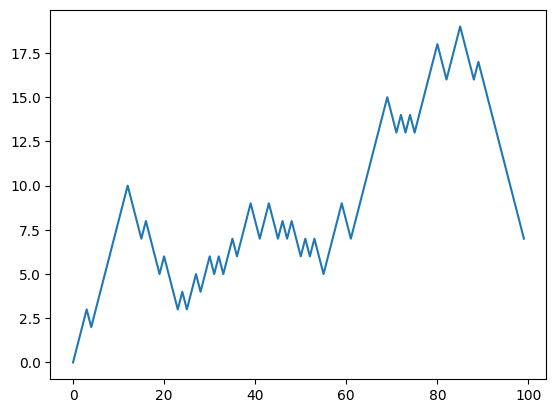

In [104]:
# 처음 100회 동안 계단 오르내리기 현황을 나타낸 그래프

plt.plot(walk[:100])

- walk는 계단으로 오르거나 내려간 값의 누적합
- numpy.random 모듈을 사용해 한 번에 1000번 수행한 결과를 저장하고 누적합을 계산

In [106]:
nsteps = 1000
rng = np.random.default_rng(seed = 12345)   # 새로운 난수 생성기
draws = rng.integers(0, 2, size = nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

- 이 시점에서부터 계단을 오르내린 위치의 최솟값/최댓값 같은 간단한 통계를 구할 수 있음

In [107]:
print(walk.min())
print(walk.max())

-8
50


- 계단에서 특정 위치에 도달하기까지의 시간과 같은 복잡한 통계도 구할 수 있음
- np.abs(walk)>=10: 처음 위치에서 10칸 이상 떨어진 시점을 알려주는 불리언 배열
- argmax: 불리언 배열에서 최댓값의 첫 번째 색인을 반환

In [108]:
(np.abs(walk) >= 10).argmax()

155

### 3.7.1 한 번에 많이 시뮬레이션하기

- 계단 르내리기 횟수를 5000회를 늘릴 경우 -> 앞선 코드를 수정
- numpy.random 함수에 크기가 2인 튜플을 넘기면 2차원 배열이 생성
- 각 열에서 누적합을 구하면 5000회의 시뮬레이션을 한 번에 처리할 수 있음

In [111]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) #0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis = 1)
walks

array([[  1,   2,   3, ...,  30,  31,  30],
       [  1,   2,   3, ..., -22, -21, -20],
       [ -1,  -2,  -1, ..., -36, -35, -36],
       ...,
       [ -1,   0,  -1, ...,  32,  31,  32],
       [ -1,  -2,  -3, ..., -10, -11, -12],
       [  1,   2,   1, ..., -14, -13, -14]])

In [112]:
print(walks.max())
print(walks.min())

119
-118


- 해당 데이터에서 누적 합이 30 혹은 -30이 되는 최소 시점을 계산
- any 메서드를 사용

In [113]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([ True,  True,  True, ...,  True, False, False])

In [115]:
hits30.sum()    # 누적합이 30 혹은 -30이 되는 횟수

3390

- 불리언 배열을 사용해 walks에서 행을 선택하고 절댓값이 30이 넘는 경우에 대해 축 1의 argmax 값을 구하면 처음 위치에서 30칸 이상 멀어지는 횟수를 구할 수 있음

In [116]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([953, 867, 359, ..., 467, 245, 235])

In [118]:
# 평균 최소 누적 합
crossing_times.mean()

507.43657817109147